# Reading MonaLIA RDF Data
To run the local SPARQL over HTTP I've installed Apache Jena Fuseki service; started the service with 20Gb memmory option; uploaded the Joconde files:

    Joconde_2018-03-21.ttl
    reprskos.rdf
    domnskos.rdf
    skos.rdf
    monalia_skos.rdf
    
Dataset can be manages from http://localhost:3030   

https://stackoverflow.com/questions/13897712/where-do-i-test-my-queries-for-my-rdf-written-in-sparql
http://jena.apache.org/documentation/serving_data/index.html#download-fuseki1

For RDF data to pandas dataframe conversion all credit to Ted Lawless
https://lawlesst.github.io/notebook/sparql-dataframe.html

In [1]:
import os
import sys
import numpy as np
import pandas as pd

import json
from SPARQLWrapper import SPARQLWrapper, JSON, N3, XML

import matplotlib.pyplot as plt

In [2]:
# Import MonaLIA library from the package in the subfolder of the notebook folder
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from MonaLIA.util import metadata_helpers as metadata


### Read the query string from the file

The file can be developed in CORESE

In [3]:
query_path = os.path.abspath(os.path.join('../..' , 'Queries', 'MonaLIA.DL Dataset.General.Full.rq'))
f = open(query_path, mode='rt', encoding='utf-8') 
qs = f.read()
f.close()
print(qs)

#MonaLIA.DL Dataset Query General All.rq
# replace first string placeholder with a list of categories so the query line reads like
#    VALUES (?topCategory_label)  { ("être humain"@fr)    ("chien"@fr)  ("élément d'architecture"@fr) } .
#
# replace second string placeholder with a list of excluded categories so the query line reads like
#			VALUES (?exceptionCategory_label)  { ("le corps humain"@fr)   } .
# or for empty exclusion list
#           VALUES (?exceptionCategory_label)  {  (""@fr)   } .


prefix skos: <http://www.w3.org/2004/02/skos/core#> 
prefix jcl: <http://jocondelab.iri-research.org/ns/jocondelab/>


select (replace(group_concat(?topCategory_label; separator="+" ), "\\+$", "")  as ?label)
          (sample(?noticeRepresentation) as ?repr)
          (sample(?imagePath) as ?image_path)
          (sample(?noticeReference) as ?ref)
          (sum(?term_count) as ?term_count_count)
          (count(?topCategory_label) - 1 as ?top_term_count ) 
          #(sample(?art_forms) 

In [16]:
include_terms_list = ['"arbre"@fr',
                        '"en buste"@fr',
                        '"fleur"@fr',
                        '"nu"@fr',
                        '"cheval"@fr',
                        '"maison"@fr',
                        '"oiseau"@fr',
                        '"bateau"@fr',
                        '"église"@fr',
                        '"de profil"@fr',
                      
                        '"à mi-corps"@fr',
                        '"chien"@fr',
                        '"de face"@fr',
                        '"ange"@fr',
                        '"couronne"@fr',
                        '"livre"@fr',
                        '"chapeau"@fr',
                        '"draperie"@fr',
                        '"château"@fr',
                        '"montagne"@fr', 
                      
                        '"croix"@fr',
                        '"cavalier"@fr',
                        '"épée"@fr',
                        '"voiture à attelage"@fr',
                        '"pont"@fr',
                        '"main"@fr',
                        '"mer"@fr',
                        '"nudité"@fr',
                        '"feuille"@fr',
                        '"bateau à voiles"@fr',
                      
                        '"armure"@fr',
                        '"uniforme"@fr',
                        '"casque"@fr',
                        '"table"@fr',
                        '"tour"@fr',
                        '"lion"@fr',
                        '"drapeau"@fr',
                        '"mouton"@fr',
                        '"nuage"@fr',
                        '"robe"@fr',

                        '"bâton"@fr',
                        '"port"@fr',
                        '"parc"@fr',
                        '"manteau"@fr',
                        '"vache"@fr',
                        '"escalier"@fr',
                        '"fusil"@fr',
                        '"lit"@fr',
                        '"pêche"@fr',
                        '"cerf"@fr',
                      
                        '"cimetière"@fr',
                        '"bouclier"@fr',
                        '"sanglier"@fr',
                        '"porte"@fr',
                        '"fenêtre"@fr',
                        '"arcade"@fr',
                        '"chaise"@fr',
                        '"pot"@fr',
                        '"flèche"@fr',
                        '"poisson"@fr',
                      
                        '"Christ en croix"@fr',
                        '"chaussure"@fr',
                        '"trône"@fr',
                        '"bonnet"@fr',
                        '"papillon"@fr',
                        '"chat"@fr',
                        '"arc"@fr',
                        '"lyre"@fr',
                        '"tonneau"@fr',
                        '"tente"@fr',
                      
                        '"singe"@fr',
                        '"sac"@fr',
                        '"bouteille"@fr',
                        '"plage"@fr',
                        '"neige"@fr',
                        '"flûte"@fr',
                        '"éventail"@fr',
                        '"échelle"@fr',
                        '"moulin à vent"@fr',
                        '"rideau"@fr',

                        '"arènes"@fr',
                        '"éléphant"@fr',
                        '"pipe"@fr',
                        '"lettre"@fr',
                        '"phare"@fr',
                        '"roue"@fr',
                        '"horloge"@fr',
                        '"couteau"@fr',
                        '"guitare"@fr',
                        '"train"@fr',
                      
                        '"harpe"@fr',
                        '"automobile"@fr',
                        '"arc monumental"@fr',
                        '"assiette"@fr',
                        '"ours"@fr',
                        '"seau"@fr',
                        '"bicyclette"@fr',
                        '"pyramide"@fr',
                        '"grenouille"@fr',
                        '"avion"@fr',

                      '"piano"@fr',
                      '"aérostat"@fr']


                        #'"être humain"@fr' ]


exclude_terms_list = []

include_terms = ' '.join(['(%s)' % x for x in include_terms_list[:40]])
exclude_terms = ' '.join(['("%s"@fr)' % x for x in exclude_terms_list])

include_terms

'("arbre"@fr) ("en buste"@fr) ("fleur"@fr) ("nu"@fr) ("cheval"@fr) ("maison"@fr) ("oiseau"@fr) ("bateau"@fr) ("église"@fr) ("de profil"@fr) ("à mi-corps"@fr) ("chien"@fr) ("de face"@fr) ("ange"@fr) ("couronne"@fr) ("livre"@fr) ("chapeau"@fr) ("draperie"@fr) ("château"@fr) ("montagne"@fr) ("croix"@fr) ("cavalier"@fr) ("épée"@fr) ("voiture à attelage"@fr) ("pont"@fr) ("main"@fr) ("mer"@fr) ("nudité"@fr) ("feuille"@fr) ("bateau à voiles"@fr) ("armure"@fr) ("uniforme"@fr) ("casque"@fr) ("table"@fr) ("tour"@fr) ("lion"@fr) ("drapeau"@fr) ("mouton"@fr) ("nuage"@fr) ("robe"@fr)'

In [17]:
qs = qs % (include_terms, exclude_terms) #, 6)
print(qs)

#MonaLIA.DL Dataset Query General All.rq
# replace first string placeholder with a list of categories so the query line reads like
#    VALUES (?topCategory_label)  { ("être humain"@fr)    ("chien"@fr)  ("élément d'architecture"@fr) } .
#
# replace second string placeholder with a list of excluded categories so the query line reads like
#			VALUES (?exceptionCategory_label)  { ("le corps humain"@fr)   } .
# or for empty exclusion list
#           VALUES (?exceptionCategory_label)  {  (""@fr)   } .


prefix skos: <http://www.w3.org/2004/02/skos/core#> 
prefix jcl: <http://jocondelab.iri-research.org/ns/jocondelab/>


select (replace(group_concat(?topCategory_label; separator="+" ), "\\+$", "")  as ?label)
          (sample(?noticeRepresentation) as ?repr)
          (sample(?imagePath) as ?image_path)
          (sample(?noticeReference) as ?ref)
          (sum(?term_count) as ?term_count_count)
          (count(?topCategory_label) - 1 as ?top_term_count ) 
          #(sample(?art_forms) 

### Specify local service

In [18]:
#wds = "http://localhost:3030/Joconde/query" #Apache 
wds = "http://localhost:8080/sparql" #Corese

### Run  query

In [19]:
image_set_df = metadata.sparql_service_to_dataframe(wds, qs)
image_set_df.head()

,label,repr,image_path,ref,term_count_count,top_term_count,terms,domain
0,,None,/0545/m033328_009455_p.jpg,M0333004601,0,0,,horlogerie ; métrologie - instruments de mesure
1,,None,/0203/m503501_d0209543-000_p.jpg,50350209543,0,0,,dessin
2,,"scène historique (Compiègne, camp militaire, t...",/0681/m505201_0005967_p.jpg,50520006604,0,0,,dessin
3,,None,/0060/m501800_96cn21119_p.jpg,50180000649,0,0,,Afrique ; croyances - coutumes ; ethnologie
4,,None,/0339/m073426_0000359_p.jpg,07340000110,0,0,,hygiène - médecine - santé


#### Give the short column names

In [8]:
col_names = ['label', 'repr', 'imagePath', 'ref',  'term_count', 'top_term_count',  'terms', 'domain']

image_set_df.columns = col_names
print('Shape:' ,  image_set_df.shape)

#image_set_df.fillna('', inplace=True)
print(image_set_df.groupby(['label']).size().reset_index())

Shape: (298511, 8)
                                                  label       0
0                                                        201062
1                                                  ange    1446
2                                            ange+arbre      53
3     ange+arbre+armure+bateau+casque+drapeau+oiseau...       1
4     ange+arbre+armure+casque+cheval+couronne+croix...       1
...                                                 ...     ...
5889                                  à mi-corps+église       5
5890                                    à mi-corps+épée      30
5891                                             église    2906
5892                                        église+épée      12
5893                                               épée     546

[5894 rows x 2 columns]


## Add image size columns (if not queried before)

quickest way but the size can be queried in the initial query

In [9]:
if('width' not in image_set_df.columns):
    csv_file_name = 'C:/Users/abobashe/Documents/MonaLIA/Joconde/Ext/main_image_size.csv'
    image_size_df = pd.read_csv(csv_file_name)
    image_root = 'C:\\Joconde\\joconde'

    try:
        image_size_df
    except NameError:
        image_set_df['width'] = 0
        image_set_df['height'] = 0

    else:
        image_set_df = pd.merge(image_set_df,
                                image_size_df[['ref', 'width', 'height']],
                                on='ref',
                                how='left')
        image_set_df.fillna(0 , inplace=True)


    error_count = 0
    new_count = 0

    for i, row in image_set_df[image_set_df.width == 0].iterrows():

        if os.path.isfile(image_root + row.imagePath) :
            try:

                image = Image.open(image_root + row.imagePath)

                # get image size
                #images_df.loc[i, ['exists']] = True
                image_set_df.loc[i, ['width']] = image.size[0]
                image_set_df.loc[i, ['height']] = image.size[1]

                image.close()
                new_count += 1
            except:
                error_count += 1
        if i % 1000 == 0:
            print (i, end=', ')

    print()            
    print('updated size %d; detected %d errors' %  (new_count, error_count))
image_set_df.head()                    

28000, 92000, 119000, 146000, 158000, 191000, 233000, 238000, 256000, 283000, 
updated size 0; detected 0 errors


,label,repr,imagePath,ref,term_count,top_term_count,terms,domain,width,height
0,,0,/0545/m033328_009455_p.jpg,M0333004601,0,0,,horlogerie ; métrologie - instruments de mesure,573,600
1,,0,/0203/m503501_d0209543-000_p.jpg,50350209543,0,0,,dessin,768,512
2,,"scène historique (Compiègne, camp militaire, t...",/0681/m505201_0005967_p.jpg,50520006604,0,0,,dessin,800,563
3,,0,/0060/m501800_96cn21119_p.jpg,50180000649,0,0,,Afrique ; croyances - coutumes ; ethnologie,358,512
4,,0,/0339/m073426_0000359_p.jpg,07340000110,0,0,,hygiène - médecine - santé,682,512


In [10]:
dataset_root = 'C:/Datasets/Joconde'
top_category =  'Full' 
class_root = os.path.join(dataset_root, top_category)
group_by = 'label'


## Filter Data
filter out the records that have invalid image path

filter out the images that are too tall or too long

In [11]:
print(image_set_df.shape , ' total')
print(image_set_df[image_set_df.width > 0].shape, 'images exist')

filtered_df = image_set_df[image_set_df.width > 0]

print(filtered_df.groupby(by=group_by).size())


(298511, 10)  total
(285144, 10) images exist
label
                                                        192821
ange                                                      1416
ange+arbre                                                  52
ange+arbre+armure+bateau+casque+drapeau+oiseau+épée          1
ange+arbre+armure+casque+cheval+couronne+croix+nuage         1
                                                         ...  
à mi-corps+église                                            5
à mi-corps+épée                                             30
église                                                    2671
église+épée                                                 12
épée                                                       527
Length: 5626, dtype: int64


filter out the Ceramics as they mess up the classification

In [12]:
filtered_df = filtered_df[filtered_df.domain.str.contains('céramique')==False]
print(filtered_df.shape, 'images excluding "céramique"')

print(filtered_df.groupby(by=group_by).size())

filtered_df.head()

(272783, 10) images excluding "céramique"
label
                                                        186350
ange                                                      1388
ange+arbre                                                  49
ange+arbre+armure+bateau+casque+drapeau+oiseau+épée          1
ange+arbre+armure+casque+cheval+couronne+croix+nuage         1
                                                         ...  
à mi-corps+église                                            5
à mi-corps+épée                                             30
église                                                    2621
église+épée                                                 12
épée                                                       498
Length: 5391, dtype: int64


,label,repr,imagePath,ref,term_count,top_term_count,terms,domain,width,height
0,,0,/0545/m033328_009455_p.jpg,M0333004601,0,0,,horlogerie ; métrologie - instruments de mesure,573,600
1,,0,/0203/m503501_d0209543-000_p.jpg,50350209543,0,0,,dessin,768,512
2,,"scène historique (Compiègne, camp militaire, t...",/0681/m505201_0005967_p.jpg,50520006604,0,0,,dessin,800,563
3,,0,/0060/m501800_96cn21119_p.jpg,50180000649,0,0,,Afrique ; croyances - coutumes ; ethnologie,358,512
4,,0,/0339/m073426_0000359_p.jpg,07340000110,0,0,,hygiène - médecine - santé,682,512


## Image Size Distribution

<Figure size 432x288 with 0 Axes>

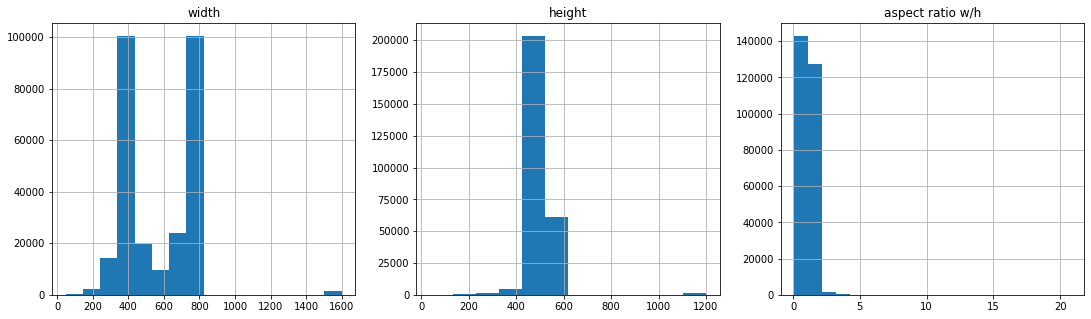

In [13]:
plt.tight_layout()
fig, axes = plt.subplots(nrows=1, ncols=3,  gridspec_kw = {'width_ratios':[1, 1, 1]})
fig.set_size_inches(18.5, 5)

axes[0].set_title('width')
filtered_df.width.hist(bins=16, ax=axes[0])
axes[1].set_title('height')
filtered_df.height.hist(bins=12, ax=axes[1])
axes[2].set_title('aspect ratio w/h')
(filtered_df.width /filtered_df.height).hist(bins=20, ax=axes[2])
plt.show()

### Save Dataset Description file

In [14]:
image_set_desc_file = os.path.join(class_root, 'dataset3.40 classes.csv')

if not os.path.exists(class_root):
    os.makedirs(class_root)
    
filtered_df.to_csv(image_set_desc_file)